First of all, we will import the required libraries. To use the TensorFlow hub, we will import it as a hub from tensorflow_hub. The functool library is used for higher-order functions that act on or return other functions. Make sure to install the if you are working on the local system. 

In [ ]:
import functools
import os
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

# **Helper fucntions to hanlde images**

Using the below lines of codes the functions to load, format, preprocess and visualize images are defined. content_image, style_image, and stylized_image are expected to be 4-D Tensors with shapes [batch_size, image_height, image_width, 3]

In [17]:
def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
  if img.max() > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()

Now, we will define the required sizes for the content images and style images. 

In [18]:
output_image_size = 384
content_img_size = (output_image_size, output_image_size)
style_img_size = (256, 256)

In the next step, we will load the content and the style images and visualize them.

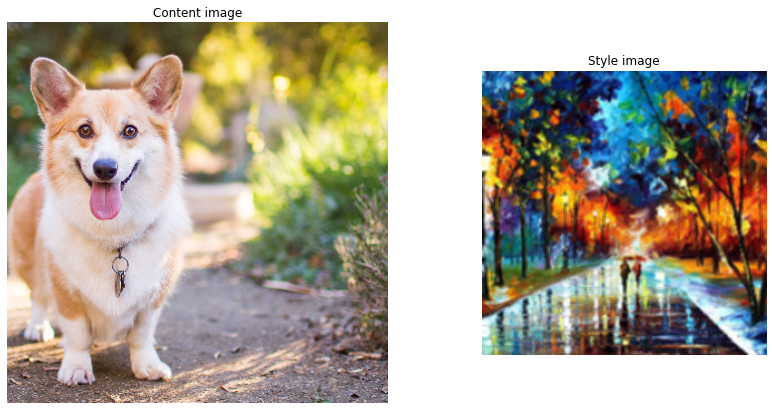

In [19]:
content_image_url = 'https://assets.teenvogue.com/photos/5ab51cbf86c99f6a2dcc100e/5:2/w_5529,h_2211,c_limit/a-corgi-runs-for-college-student-government-president.jpg'
style_image_url = 'https://afremov.com/images/product/rainy-park.jpg'
content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
show_n([content_image, style_image], ['Content image', 'Style image'])

Using the blow lines of codes, the style is transferred using the HUB module and the output image is generated.

In [20]:
import time
start_time = time.time()
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)
outputs = hub_module(content_image, style_image)
stylized_image = outputs[0]
# Stylize content image with given style image.
# This is pretty fast within a few milliseconds on a GPU.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

 the style is transferred to the original image, we will visualize it all together using the below lines of codes.

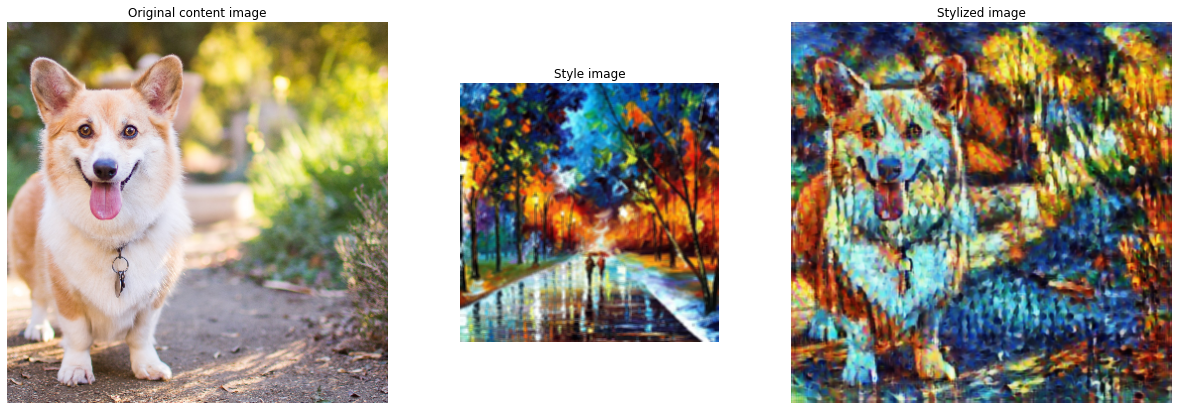

In [21]:
# Visualize input images and the generated stylized image.
show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])

In [22]:
end_time = time.time()
print('Time Taken = ', end_time-start_time)

Time Taken =  19.485920667648315


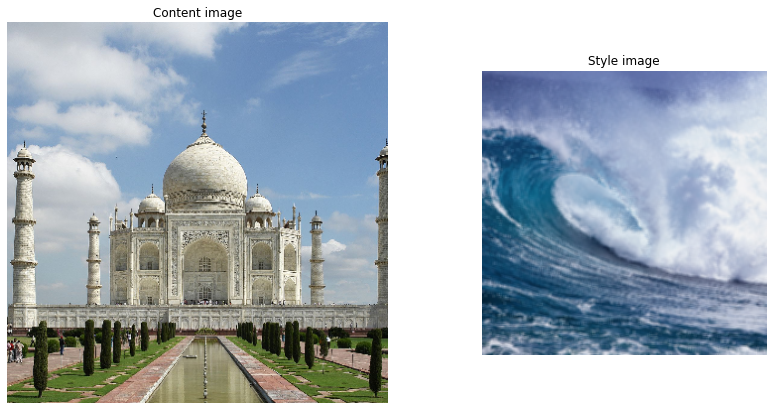

In [23]:
content_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Taj_Mahal_%28Edited%29.jpeg/1920px-Taj_Mahal_%28Edited%29.jpeg'
style_image_url = 'https://joeburciaga.files.wordpress.com/2013/02/tsunami-2698.jpg'
content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
show_n([content_image, style_image], ['Content image', 'Style image'])

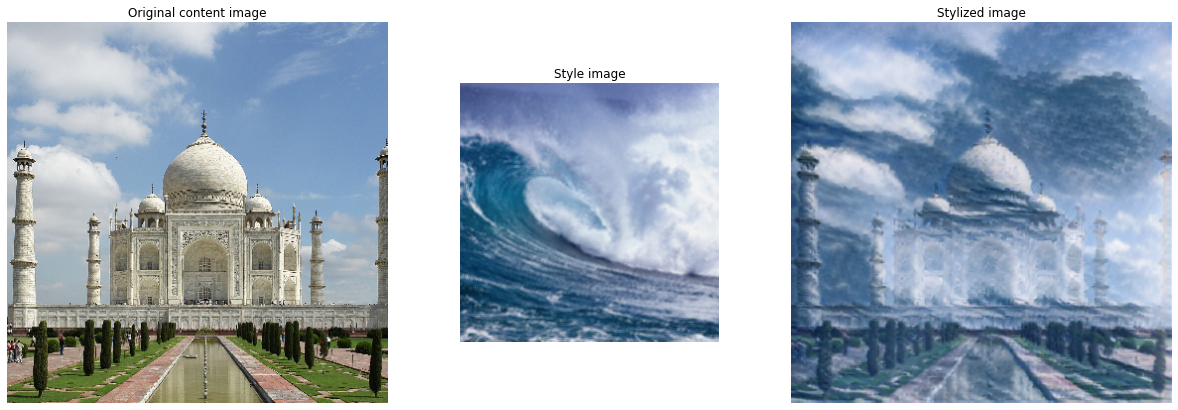

In [24]:
start_time = time.time()
outputs = hub_module(content_image, style_image)
stylized_image = outputs[0]
# Stylize content image with given style image.
# This is pretty fast within a few milliseconds on a GPU.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]
# Visualize input images and the generated stylized image.
show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])


In [25]:
end_time = time.time()
print('Time Taken = ', end_time-start_time)

Time Taken =  12.585912942886353


So, as we could see that using the TF-Hub module, it is very easy to transfer style from one image to another. It can be done very fastly in very few steps. It takes less than 4 seconds to style transfer in images. It also requires very less computation time and resources for execution. 